## Feature Engineering Part 1

###### Purpose of feature engineering is allowing models to learn from data and generalize better. The way of helping models in this aim might be excracting new features and transforming features  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
#import statsmodels.api as sm
#import pylab
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from erroranal import ErrorAnalysis # erroranal is a small python file which incluades 
# a small class,ErrorAnalysis, and a few methods to create a short way of some codes which are oftenly
# used.
%matplotlib inline

In [3]:
data = pd.read_csv("data.csv")
data.drop(columns=["Unnamed: 0"], axis=1 , inplace=True)
df = data.copy()
df.YearRemodAdd[523]=2007
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,60,RL,65.0,8450,Pave,NoAll,Reg,Lvl,AllPub,Inside,...,0,0,NoP,NoF,NoM,0,2,2008,WD,208500
1,20,RL,80.0,9600,Pave,NoAll,Reg,Lvl,AllPub,FR2,...,0,0,NoP,NoF,NoM,0,5,2007,WD,181500
2,60,RL,68.0,11250,Pave,NoAll,IR1,Lvl,AllPub,Inside,...,0,0,NoP,NoF,NoM,0,9,2008,WD,223500
3,70,RL,60.0,9550,Pave,NoAll,IR1,Lvl,AllPub,Corner,...,0,0,NoP,NoF,NoM,0,2,2006,WD,140000
4,60,RL,84.0,14260,Pave,NoAll,IR1,Lvl,AllPub,FR2,...,0,0,NoP,NoF,NoM,0,12,2008,WD,250000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


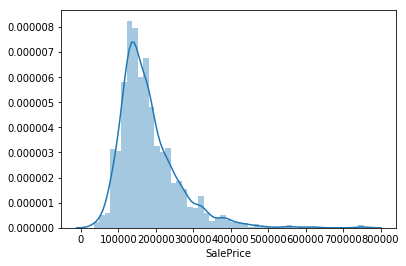

In [4]:
sns.distplot(df.SalePrice)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


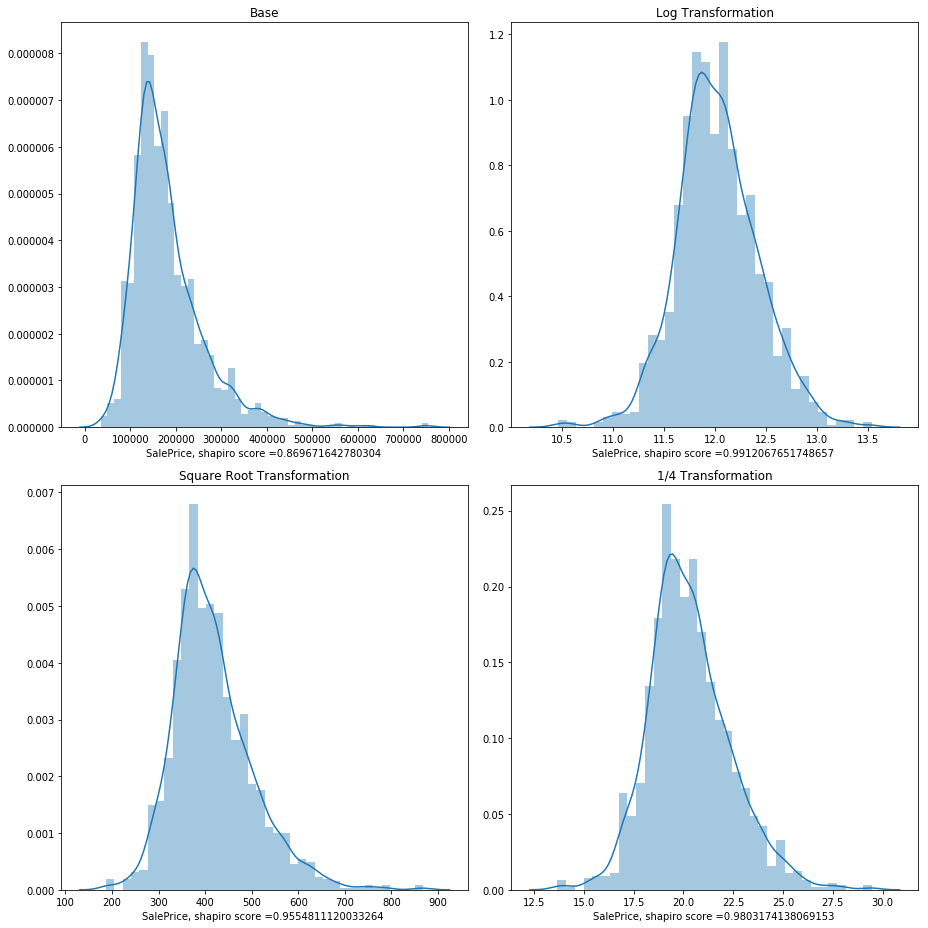

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13,13))

sns.distplot(df.SalePrice, ax=axes[0][0])
axes[0][0].set_title("Base")
axes[0][0].set_xlabel(f"SalePrice, shapiro score ={shapiro(df.SalePrice)[0]} ")

sns.distplot(np.log(df.SalePrice), ax=axes[0][1])
axes[0][1].set_title("Log Transformation")
axes[0][1].set_xlabel(f"SalePrice, shapiro score ={shapiro(np.log(df.SalePrice))[0]} ")

sns.distplot(np.power(df.SalePrice,1/2), ax= axes[1][0])
axes[1][0].set_title("Square Root Transformation")
axes[1][0].set_xlabel(f"SalePrice, shapiro score ={shapiro(np.power(df.SalePrice,1/2))[0]} ")


sns.distplot(np.power(df.SalePrice,1/4), ax= axes[1][1])
axes[1][1].set_title("1/4 Transformation")
axes[1][1].set_xlabel(f"SalePrice, shapiro score ={shapiro(np.power(df.SalePrice,1/4))[0]} ")

plt.tight_layout()

In [6]:
df.SalePrice = np.log(df.SalePrice)

###### As mentioned before, the target variable Sale Price is right-skewed distributed. There appear couple of transformation above and log transformation gives the best and pretty good result.   

In [9]:
df.MSSubClass = df.MSSubClass.astype(str)
df.OverallQual = df.OverallQual.astype(str)
df.OverallCond = df.OverallCond.astype(str)
df.GarageYrBlt.replace(to_replace="NoG", value=float(0), inplace=True)

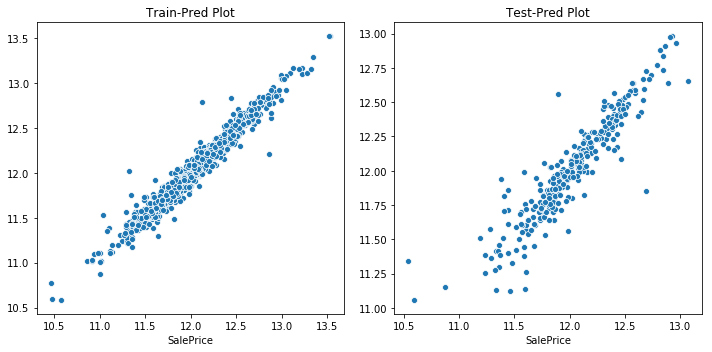

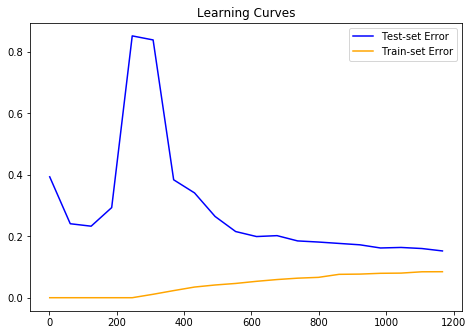

(0.08458138567713647, 0.15215529377909007)

In [21]:
err = ErrorAnalysis(df, target="SalePrice", feat_drop=["LotFrontage","Utilities"], sample_drop=[1298])
# ErrorAnalysis takes inputs, some of them appear above and according to these inputs it prepare
# the infrastructure for the model. For example, it takes dataset, target variable, features and  
# which will be dropped, seed then it prepare dataset according to the inputs.

err.scat() # This method is to show if predictions and true values stay on the same line.

err.learning_curves() # It draws curves by number of training examples.

err.fit() # fit() method build Linear regression and print out train and test errors.

###### Top two plots above output shows if models train and test predictions match with the true values. Train predictions show a great performance and points follow similar patterns. In test predictions, model could stumble in some regions especially in the lower left corner. In addtion the last row gives the RMSE in the order of train error and test error. This errors also satisfy the interpretation above.
###### The Learning Curves plot show error's beahviour by train set size. The peak point in test error takes attention. The reason of this increment may be outlying poinst in the test or probably too small size of training set does not allow the model to generalize.

In [ ]:
k = df.MSZoning.copy()
k[df.MSZoning == "FV"] = "Others"
k[df.MSZoning == "RH"] = "RM"
k[df.MSZoning == "C (all)"] = "Others"
df.MSZoning = k

###### Classes which incluades few samples are group since they have no information to represent their classes.

In [22]:
df["HalfBath"][ (df.FullBath == 0) & (df.HalfBath==0 )] = 0.1
df["BathRat"] = df.GrLivArea/ (df.FullBath+df.HalfBath/2)
df["RoomRat"] = df.GrLivArea/ df.TotRmsAbvGrd

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
k = ErrorAnalysis(df, target="SalePrice", feat_drop=["LotFrontage","Utilities"], sample_drop=[1298])    
k.fit()

(0.08369167907278918, 0.1482659794350638)

In [ ]:
df["TotalSF"] = df[["TotalBsmtSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
                    "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"]].sum(axis=1)

In [24]:
df.KitchenQual.unique()
kitcscore = df.KitchenQual.copy()
kitcscore[df.KitchenQual == "Po"] = 1
kitcscore[df.KitchenQual == "Fa"] = 2
kitcscore[df.KitchenQual == "TA"] = 3
kitcscore[df.KitchenQual == "Gd"] = 4
kitcscore[df.KitchenQual == "Ex"] = 5
kitcscore = kitcscore
kitcscore.unique()

array([4, 3, 5, 2], dtype=object)

In [25]:
df["KitchenScore"] =df.KitchenAbvGr * kitcscore

In [26]:
k = ErrorAnalysis(df, target="SalePrice", feat_drop=["LotFrontage","Utilities"], sample_drop=[1298])    
k.fit()

(0.08355489277202185, 0.1474437323212306)

In [28]:
var1 = df.YrSold - df.YearBuilt
var2 = df.YrSold - df.YearRemodAdd
df["OldBeforeSale"] = (var1+np.exp(1))**2
# df["RemodBefSale"] = var2 #transofrmationları da işe yaramıyo
df["Age"] = np.log(2011 - df.YearBuilt)

In [29]:
var = (2011-df.YearBuilt)**2 - (2011-df.YearRemodAdd)**2
df["OldRate"] = np.log(var + 100)

In [30]:
err = ErrorAnalysis(df, target="SalePrice", feat_drop=["LotFrontage","Utilities"], sample_drop=[1298])    
err.fit()

(0.08352499285761537, 0.1466534882910706)

array([[ 1.        , -0.34484365],
       [-0.34484365,  1.        ]])

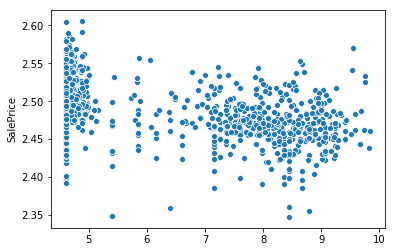

In [31]:
#sns.distplot((k+100)**(1/4))
sns.scatterplot(np.log(k+100),np.log(df.SalePrice))
np.corrcoef(np.log(k+100),np.log(df.SalePrice))

In [32]:
bsmtqual = df.BsmtQual.copy()
bsmtqual[df.BsmtQual == "Ex"] = 6
bsmtqual[df.BsmtQual == "Gd"] = 5
bsmtqual[df.BsmtQual == "TA"] = 4
bsmtqual[df.BsmtQual == "Fa"] = 3
bsmtqual[df.BsmtQual == "Po"] = 2
bsmtqual[df.BsmtQual == "NoB"] = 1
bsmtqual=bsmtqual.astype(int)
df["BsmtScore1"] = bsmtqual*np.log(df.BsmtFinSF1+3)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([[1.        , 0.42195711],
       [0.42195711, 1.        ]])

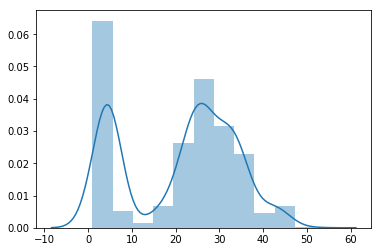

In [34]:
sns.distplot(bsmtqual*np.log(df.BsmtFinSF1+np.exp(1)))
np.corrcoef(bsmtqual*np.log(df.BsmtFinSF1+np.exp(1)),df.SalePrice)

In [35]:
df.BsmtScore1 = bsmtqual*np.log(df.BsmtFinSF1+np.exp(1))
err = ErrorAnalysis(df, target="SalePrice", feat_drop=["LotFrontage","Utilities"], sample_drop=[1298])    
err.fit()

(0.08341775053075572, 0.14593811208481278)

In [38]:
df.KitchenAbvGr[df.KitchenAbvGr == 0] = 1
df["KitcRat"] = df.GrLivArea/ df.KitchenAbvGr

In [39]:
totaloutsf = df[["TotalBsmtSF","GarageArea","WoodDeckSF","OpenPorchSF",
                    "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"]].sum(axis=1)
totaloutsf[totaloutsf == 0] = 1
df["TotalOutSF"] = totaloutsf

In [40]:
df["GarageRat"] = np.log(df.GarageArea / df.TotalOutSF +3)
df["WoodRat"] = np.log(df.WoodDeckSF / df.TotalOutSF +3)
df["OpenPorRat"] = np.log(df.OpenPorchSF / df.TotalOutSF +3)
df["BsmtRat"] = np.log(df.TotalBsmtSF / df.TotalOutSF +3)
df["EncPorRat"] = np.log(df.EnclosedPorch / df.TotalOutSF +3)
df["3SsnPorRat"] = np.log(df["3SsnPorch"] / df.TotalOutSF +3)
df["ScreenPorRat"] = np.log(df.ScreenPorch / df.TotalOutSF +3)
df["PoolRat"] = np.log(df.PoolArea / df.TotalOutSF +3)

###### The feature TotalOutSF created to learn how area the houses have outside. Then it is used to extract the effect of outbuildings.

###### In this notebook, new features extracted and some of them put into the model by transforming

In [53]:
#df.to_csv("data_fe1.csv")